In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
path = "/mnt/c/Users/olivi/OneDrive - Amherst College/6 Summer 2025/surface-detection/logs/paper"
ipath = "/mnt/c/Users/olivi/OneDrive - Amherst College/6 Summer 2025/surface-detection/figures/paper"
colors = plt.get_cmap('Set2').colors

##### Augmentations Boxplot

In [4]:
users = ["User 1", "User 2", "User 3", "User 4", "User 5"]

# maya's results by user
r50x2 = [0.886736842, 0.763975155, 0.869501278, 0.856245615, 0.833045374]
r50x4 = [0.863820662, 0.755020704, 0.837027563, 0.819805067, 0.812569419]
n50x2 = [0.951111112, 0.820652174, 0.929738562, 0.856, 0.91324201]
n50x4 = [0.93851852, 0.876604556, 0.950127877, 0.898473684, 0.922232507]
n50x6 = [0.944666668, 0.861449275, 0.941368286, 0.893175439, 0.912213583]

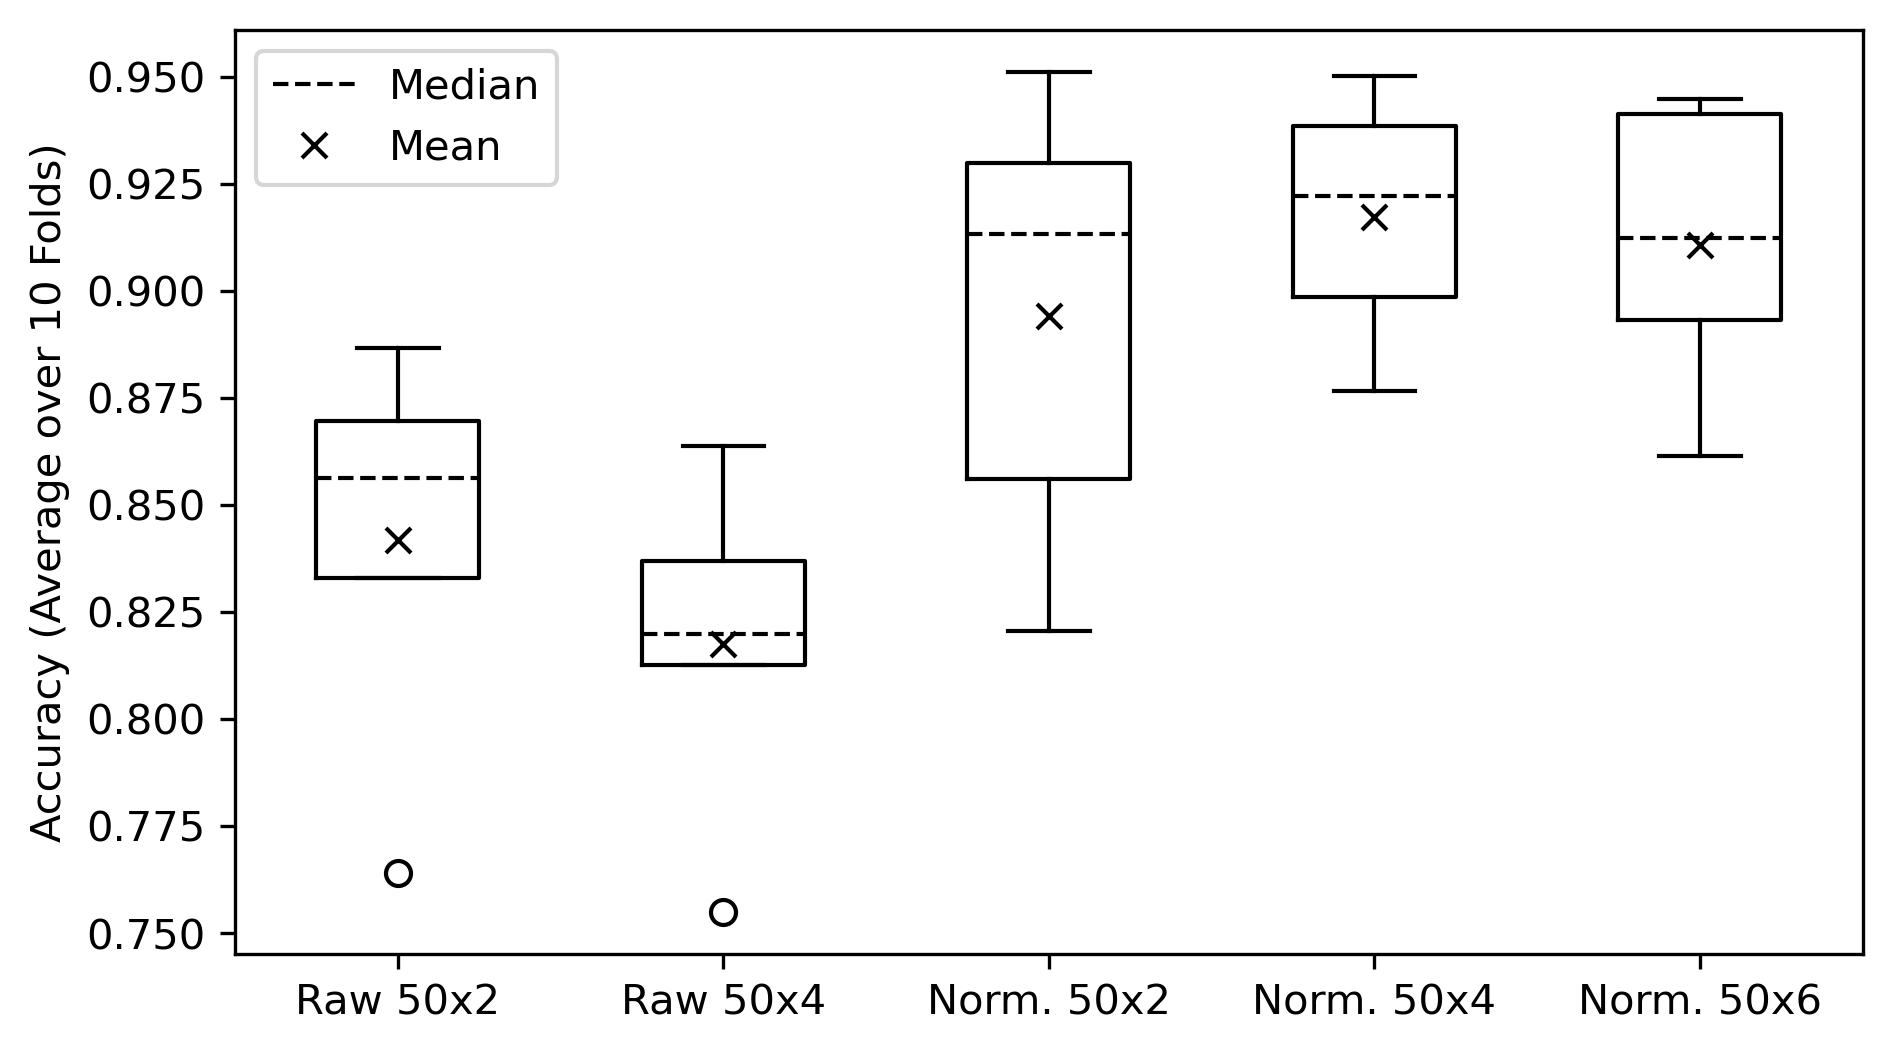

In [26]:
arr = np.stack((r50x2, r50x4, n50x2, n50x4, n50x6), axis=1)
meanpoint = dict(marker='x', markerfacecolor='black', markeredgecolor='black')
medianprops = dict(linestyle='--', color='black')
plt.figure(figsize=(7, 4), dpi=300) 
bp = plt.boxplot(arr, showmeans=True, medianprops=medianprops, meanprops=meanpoint)
plt.xticks([1, 2, 3, 4, 5], ["Raw 50x2", "Raw 50x4", "Norm. 50x2", "Norm. 50x4", "Norm. 50x6"])
plt.ylabel("Accuracy (Average over 10 Folds)")
plt.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
plt.savefig(f"{ipath}/augs.tif", dpi=300, bbox_inches='tight')

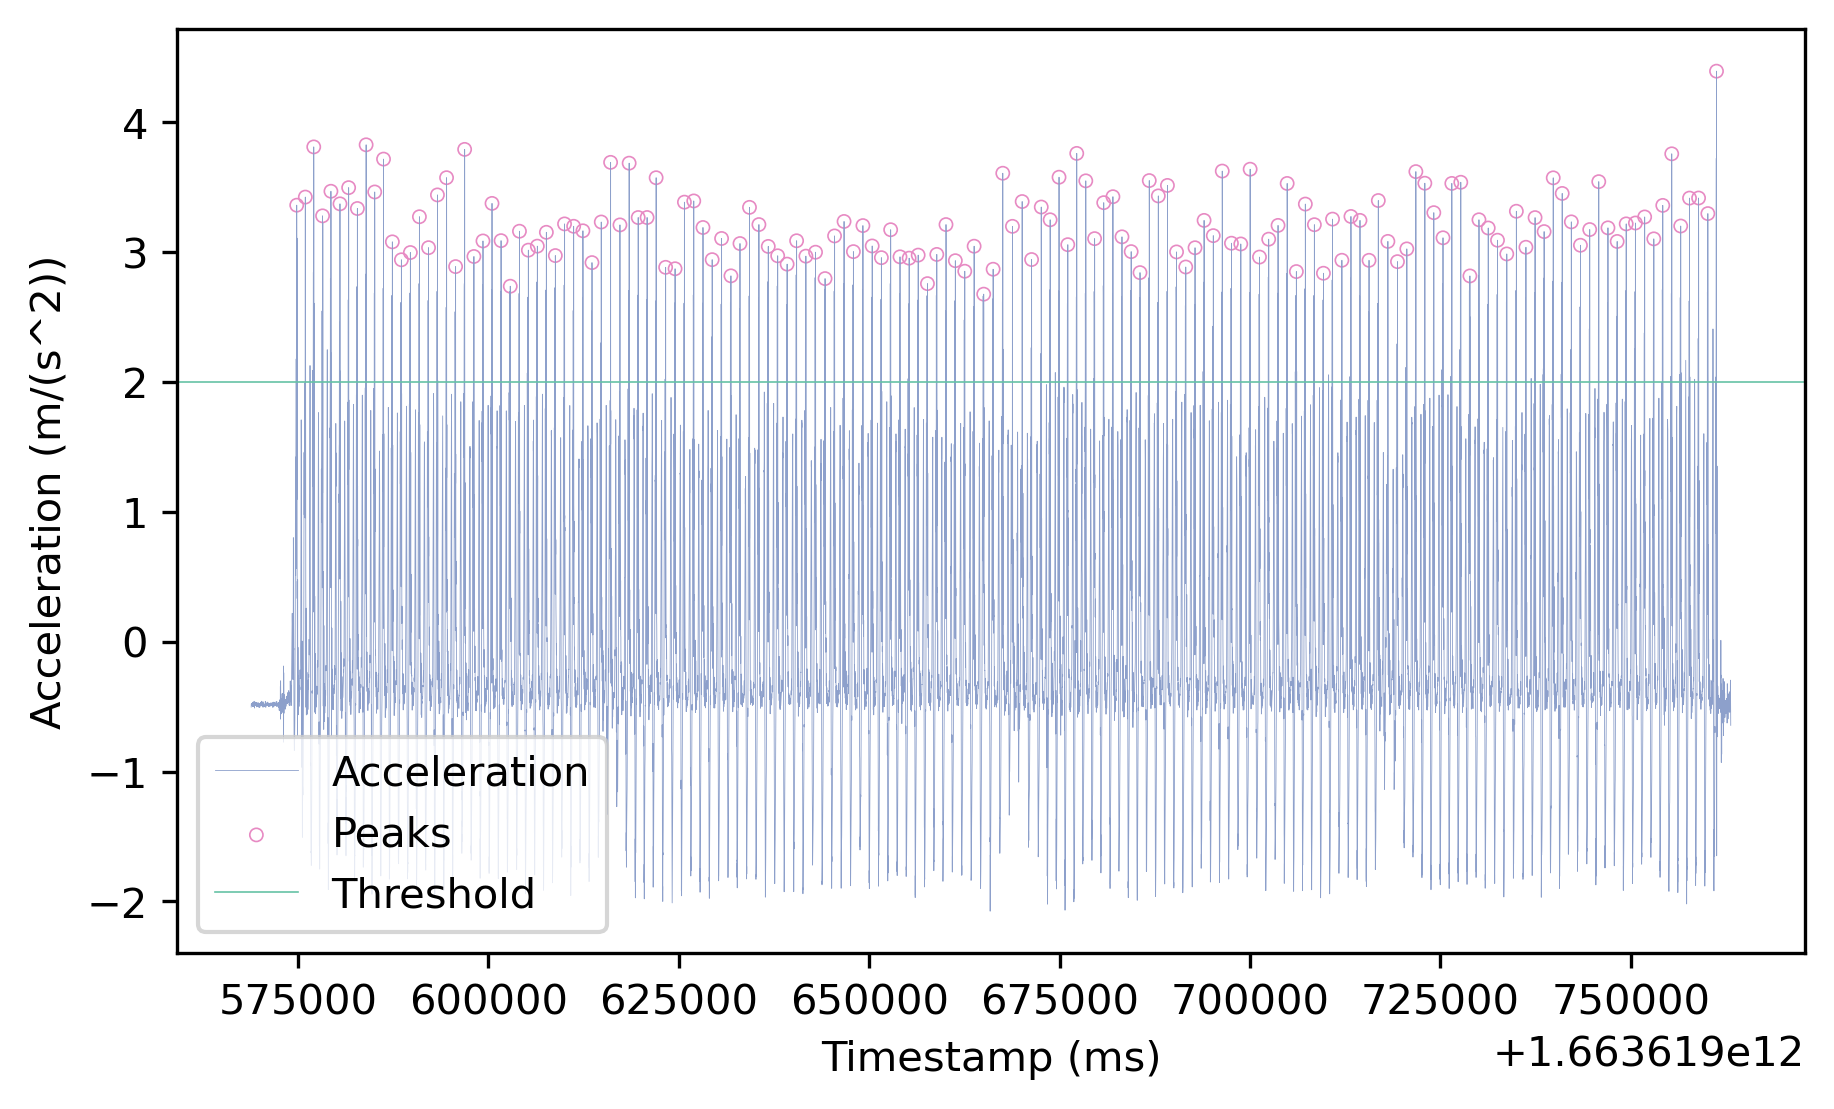

In [29]:
# peak detection demonstration (1A)
sample = pd.read_csv(f"{path}/peaks_1A.csv")
accel = (sample['Acceleration'] - sample['Acceleration'].mean()) / sample['Acceleration'].std()
plt.figure(figsize=(7, 4), dpi=300) 
plt.plot(sample['Timestamp'], accel, linewidth=0.2, color=colors[2], label="Acceleration")
locs = sample['Peaks'] == 1
plt.scatter(sample['Timestamp'][locs], accel[locs], marker='o', s=10, facecolors='none', edgecolors=colors[3], linewidths=0.4, label="Peaks")
plt.axhline(2, linewidth=0.4, label="Threshold", color=colors[0])
plt.xlabel("Timestamp (ms)")
plt.ylabel("Acceleration (m/(s^2))")
plt.legend(loc='lower left')
plt.savefig(f"{ipath}/peakdet.tif", dpi=300, bbox_inches="tight")

##### Segmentation Differences

In [120]:
# difference in peaks between methods
m1 = pd.read_csv(f"{path}/peaks1.csv")
m2 = pd.read_csv(f"{path}/peaks2.csv")

In [267]:
m2.count().sum()

3570

In [261]:
# number of points more than 3 standard deviations away
def norm(col, dmean, dstd):
    # return (col - dmean) / dstd
    return (col - col.mean()) / col.std()

def outliers(df):
    normalized = df.apply(norm, args=(df.mean(), df.std()))
    return (normalized <= -3).sum().sum(), (normalized >= 3).sum().sum()

In [262]:
lo1, hi1 = outliers(m1)
lo2, hi2 = outliers(m2)
print(f"{lo1}, {hi1}")
print(f"{lo2}, {hi2}")

4, 3
4, 10


In [227]:
# dataset information
def countsbar(df1, df2):
    locs = ["A", "B", "C", "D", "E"]
    counts1 = np.zeros((5,5)) # users x locations
    counts2 = np.zeros((5,5))
    for i in range(5):
        for j, l in enumerate(locs):
            cname = str(i+1) + l
            counts1[i][j] = df1[cname].count()
            counts2[i][j] = df2[cname].count()  

    x = np.arange(5)
    width = 0.35
    fig, ax = plt.subplots(layout='constrained')
    bottom1 = np.zeros(5)
    bottom2 = np.zeros(5)
    for i, row1 in enumerate(counts1):
        row2 = counts2[i, :]
        bars1 = ax.bar(x, row1, width, bottom=bottom1, label="User"+str(i+1), color = colors[i])
        bars2 = ax.bar(x+width+0.06, row2, width, bottom=bottom2, color=colors[i])
        bottom1 += row1 
        bottom2 += row2
    ax.set_xticks(x + width/2 + 0.03)
    ax.bar_label(bars1)
    ax.bar_label(bars2)
    ax.set_xticklabels(locs)
    ax.set_xlabel("Location")
    ax.set_ylabel("Number of Sequences")
    ax.legend(loc='lower left')
    plt.show()

In [ ]:
countsbar(m1, m2)

In [160]:
def usercounts(df):
    locs = ["A", "B", "C", "D", "E"]
    counts = np.zeros((5,5)) # users x locations
    for i in range(5):
        for j, l in enumerate(locs):
            cname = str(i+1) + l
            counts[i][j] = df[cname].count()
    counts[3][1] -= 1
    return counts.sum(1)

##### Example Image (1A)

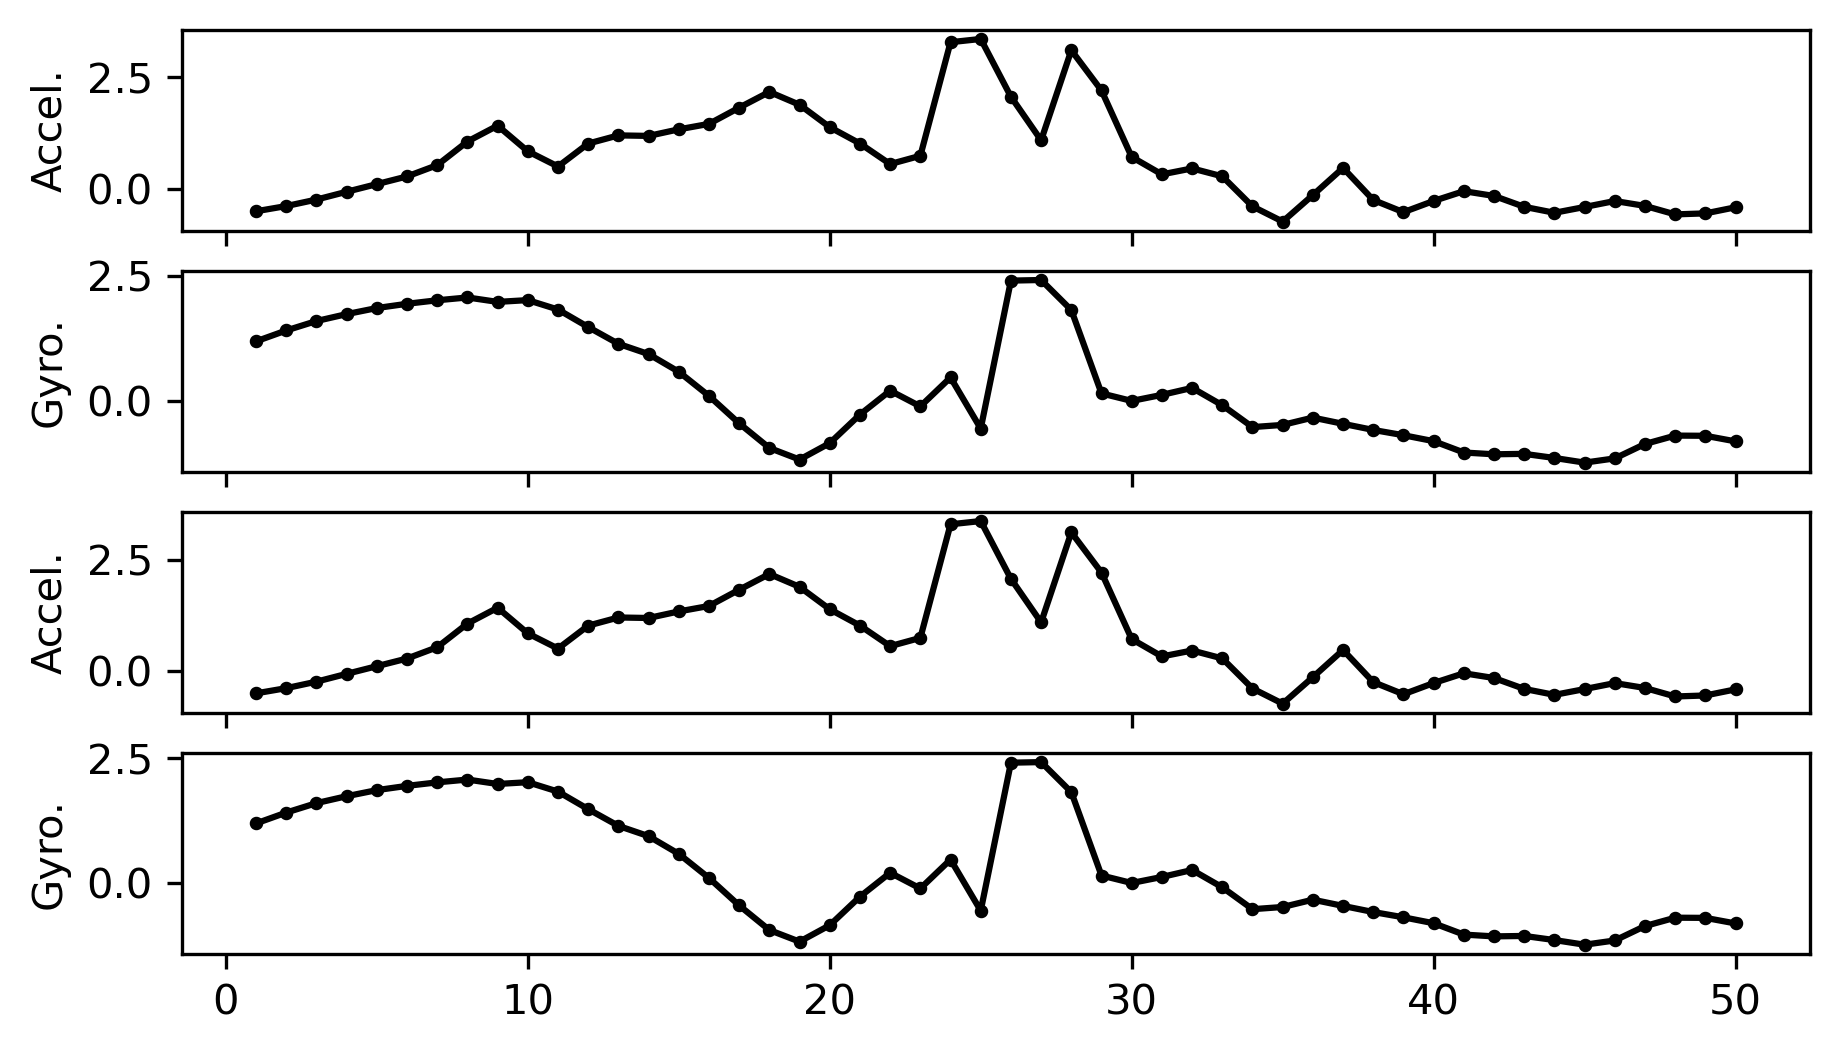

In [78]:
A = np.loadtxt(f"{path}/image_1A.csv", delimiter=",")
labels = ["Accel.", "Gyro.", "Accel.", "Gyro."]
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(7, 4), dpi=300)
for i in range(4):
    axs[i].scatter(list(range(1,51)), A[:,i], color='black', s=5)
    axs[i].plot(list(range(1,51)), A[:,i], color='black')
    axs[i].set_ylabel(labels[i])
plt.savefig(f"{ipath}/image.png", dpi=300, bbox_inches="tight")

In [18]:
one = [0.815, 0.794, 0.75, 0.671, 0.915]
two_ours = [0.9152, 0.8686]
two_alex = [0.8326, 0.8019]
three = [1169905, 22616965]

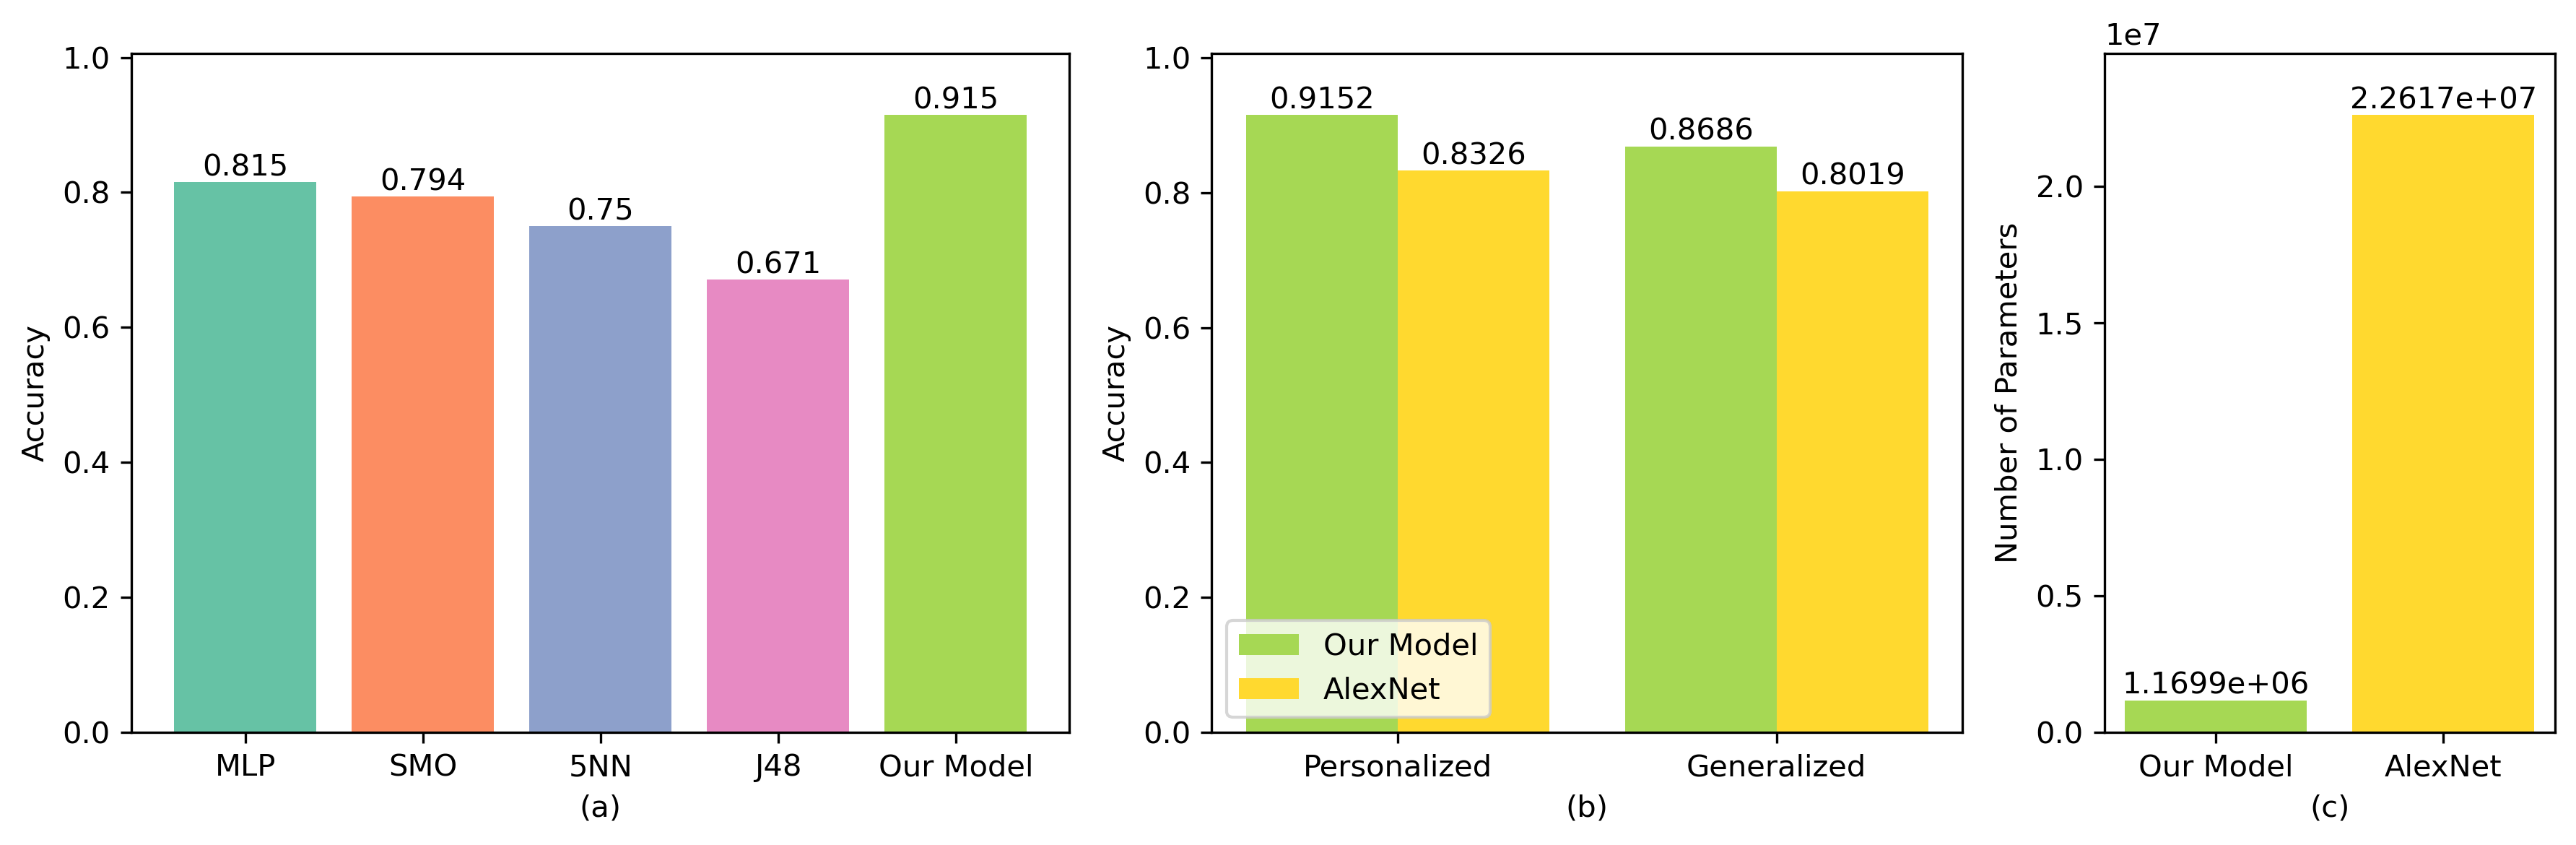

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=300, width_ratios=[5, 4, 2.4])

b0 = axs[0].bar(["MLP", "SMO", "5NN", "J48", "Our Model"], one, color=colors)
axs[0].bar_label(b0)
axs[0].set_ylabel("Accuracy")
axs[0].margins(y=0.1)
axs[0].set_xlabel("(a)")

x = np.arange(2)
width = 0.4
b1a = axs[1].bar(x - width/2, two_ours, width, label="Our Model", color=colors[4])
b1b = axs[1].bar(x + width/2, two_alex, width, label="AlexNet", color=colors[5])
axs[1].bar_label(b1a)
axs[1].bar_label(b1b)
axs[1].set_xticks(x)
axs[1].set_xticklabels(["Personalized", "Generalized"])
axs[1].set_ylabel("Accuracy")
axs[1].legend(loc='lower left')
axs[1].margins(y=0.1)
axs[1].set_xlabel("(b)")

b2 = axs[2].bar(["Our Model", "AlexNet"], three, color=[colors[4], colors[5]])
axs[2].bar_label(b2)
axs[2].set_ylabel("Number of Parameters")
axs[2].margins(y=0.1)
axs[2].set_xlabel("(c)")

plt.tight_layout()
plt.savefig(f"{ipath}/acc.png", dpi=300, bbox_inches="tight")